# DA_Fall21_HW_3 Support Vector Machine and Decision Trees

# Due on 11/22 23:59 pm

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## We will use the same affair dataset from HW2, but will skip the EDA phrase we have done enough of it

#### Everything removing outliers, create dummies variabes had been done for you

In [31]:
# Remember the affair data set from HW3, we will use that dataset again
# but we will directly load it from the API
orig_df = pd.read_csv("affairs2.csv")
# Set up our target class label
orig_df['had_affair'] = orig_df['affairs'].apply(lambda x: 1 if x != 0 else 0)
orig_df = orig_df.drop('affairs',axis=1)
# remove NA
orig_df.dropna(inplace=True)
# make sure there is no missing values
orig_df.isnull().sum()

rate_marriage      0
age                0
yrs_married        0
children           0
religious          0
educ               0
occupation         0
occupation_husb    0
had_affair         0
dtype: int64

In [32]:
# separate the features into categorical vs numerical
numerical_features = ['age', 'yrs_married', 'children']
categorical_features = ['rate_marriage', 'religious', 'educ', 'occupation', 'occupation_husb']
# collect all numerical features with the target variables first
numerical_df = orig_df[numerical_features + ['had_affair']]
numerical_df.head()

,age,yrs_married,children,had_affair
0,32.0,9.0,3.0,1
1,27.0,13.0,3.0,1
2,22.0,2.5,0.0,1
3,37.0,16.5,4.0,1
4,27.0,9.0,1.0,1


In [33]:
# create corresponding dummies variables
rate_marriage = pd.get_dummies(orig_df['rate_marriage'],drop_first=True)
religious = pd.get_dummies(orig_df['religious'],drop_first=True)
edu = pd.get_dummies(orig_df['educ'],drop_first=True)
occ = pd.get_dummies(orig_df['occupation'],drop_first=True)
husb_occ = pd.get_dummies(orig_df['occupation_husb'],drop_first=True)

In [34]:
rate_marriage.head()

,2.0,3.0,4.0,5.0
0,0,1,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,1,0
4,0,0,0,1


In [35]:
religious.head()

,2.0,3.0,4.0
0,0,1,0
1,0,0,0
2,0,0,0
3,0,1,0
4,0,0,0


In [36]:
# better to create a header to avoid same name
rate_marriage.columns = ['rate1','rate2','rate3','rate4']
rate_marriage

,rate1,rate2,rate3,rate4
0,0,1,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,1,0
4,0,0,0,1
...,...,...,...,...
6466,0,0,0,1
6467,0,0,1,0
6468,0,0,0,1
6469,0,0,0,1


In [37]:
religious.columns = ['re1','rel2','rel3']
religious.head()

,re1,rel2,rel3
0,0,1,0
1,0,0,0
2,0,0,0
3,0,1,0
4,0,0,0


***Now we can concatnate the numerical features with rate_marriage and religious variabes***

In [38]:
df = pd.concat([numerical_df, rate_marriage, religious], axis=1)
df.head()

,age,yrs_married,children,had_affair,rate1,rate2,rate3,rate4,re1,rel2,rel3
0,32.0,9.0,3.0,1,0,1,0,0,0,1,0
1,27.0,13.0,3.0,1,0,1,0,0,0,0,0
2,22.0,2.5,0.0,1,0,0,1,0,0,0,0
3,37.0,16.5,4.0,1,0,0,1,0,0,1,0
4,27.0,9.0,1.0,1,0,0,0,1,0,0,0


### The goal of this homework is to practice building Support Vector Machine and Decision Tree Models.

### Part A: Support Vector Machine

***Follow the standard way of building a model and in particular,***
1. Build a classification model using SVC using Linear Kernel without specifying the c-parameter using the above provided data frame
2. Try different values of C-parameters (at least one small and one bigger value)
3. Try using rbf as your kernel and use Gamma of 2**-5, 0.1, 1 and 2 with default value for C-parameter
4. Answer the question out of all the models above, what is the best choice for the kernel, C and gamma parameters
Explain briefly the effect of using different parameter values


***Type your answers and code here***

In [39]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

In [40]:
X = df.drop('had_affair', axis=1).values
Y = df['had_affair'].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=0)
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, Y_train)

SVC(kernel='linear')

In [41]:
#1-Build a classification model using SVC using Linear Kernel without specifying the c-parameter using the above provided data frame
Y_pred = svclassifier.predict(X_test)
print(classification_report(Y_test, Y_pred))
print(accuracy_score(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.78      0.87      0.82       885
           1       0.60      0.42      0.50       389

    accuracy                           0.74      1274
   macro avg       0.69      0.65      0.66      1274
weighted avg       0.72      0.74      0.72      1274

0.7362637362637363


In [49]:
#2-Try different values of C-parameters (at least one small and one bigger value)
svclassifier = SVC(kernel='linear', C=2**-11)
svclassifier.fit(X_train, Y_train)
Y_pred = svclassifier.predict(X_test)
print(classification_report(Y_test, Y_pred))
print(accuracy_score(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.69      1.00      0.82       885
           1       0.00      0.00      0.00       389

    accuracy                           0.69      1274
   macro avg       0.35      0.50      0.41      1274
weighted avg       0.48      0.69      0.57      1274

0.6946624803767661


In [51]:
#2-Try different values of C-parameters (at least one small and one bigger value)
svclassifier = SVC(kernel='linear', C=2**11)
svclassifier.fit(X_train, Y_train)
Y_pred = svclassifier.predict(X_test)
print(classification_report(Y_test, Y_pred))
print(accuracy_score(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.78      0.87      0.82       885
           1       0.60      0.42      0.50       389

    accuracy                           0.74      1274
   macro avg       0.69      0.65      0.66      1274
weighted avg       0.72      0.74      0.72      1274

0.7362637362637363


In [45]:
#3-Try using rbf as your kernel and use Gamma of 2**-5, 0.1, 1 and 2 with default value for C-parameter
svclassifier = SVC(kernel='rbf', gamma=2**-5)
svclassifier.fit(X_train, Y_train)
Y_pred = svclassifier.predict(X_test)
print(classification_report(Y_test, Y_pred))
print(accuracy_score(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.76      0.91      0.83       885
           1       0.64      0.34      0.45       389

    accuracy                           0.74      1274
   macro avg       0.70      0.63      0.64      1274
weighted avg       0.72      0.74      0.71      1274

0.7394034536891679


In [46]:
#3-Try using rbf as your kernel and use Gamma of 2**-5, 0.1, 1 and 2 with default value for C-parameter
svclassifier = SVC(kernel='rbf', gamma=0.1)
svclassifier.fit(X_train, Y_train)
Y_pred = svclassifier.predict(X_test)
print(classification_report(Y_test, Y_pred))
print(accuracy_score(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.76      0.91      0.83       885
           1       0.62      0.34      0.44       389

    accuracy                           0.74      1274
   macro avg       0.69      0.62      0.63      1274
weighted avg       0.72      0.74      0.71      1274

0.7354788069073783


In [47]:
#3-Try using rbf as your kernel and use Gamma of 2**-5, 0.1, 1 and 2 with default value for C-parameter
svclassifier = SVC(kernel='rbf', gamma=1)
svclassifier.fit(X_train, Y_train)
Y_pred = svclassifier.predict(X_test)
print(classification_report(Y_test, Y_pred))
print(accuracy_score(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.75      0.87      0.80       885
           1       0.53      0.34      0.42       389

    accuracy                           0.71      1274
   macro avg       0.64      0.61      0.61      1274
weighted avg       0.68      0.71      0.69      1274

0.707221350078493


In [48]:
#3-Try using rbf as your kernel and use Gamma of 2**-5, 0.1, 1 and 2 with default value for C-parameter
svclassifier = SVC(kernel='rbf', gamma=2)
svclassifier.fit(X_train, Y_train)
Y_pred = svclassifier.predict(X_test)
print(classification_report(Y_test, Y_pred))
print(accuracy_score(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.75      0.88      0.81       885
           1       0.54      0.32      0.41       389

    accuracy                           0.71      1274
   macro avg       0.65      0.60      0.61      1274
weighted avg       0.69      0.71      0.69      1274

0.7103610675039247


#### #4- Answer the question out of all the models above, what is the best choice for the kernel, C and gamma parameters. Explain briefly the effect of using different parameter values

The best choice (based on accuracy scores) for the kernel was rbf, the best choice for C was 2^11, and the best choice for gamma was 2^-5.
For our C value, too high and the variance will be higher with a lower bias (overfitting). Too low and the variance will be lower and the bias will be higher (underfitting).
For our gamma value our line of decision will  not be as straight because the closer points will have more weight. If the gamma value is too low, the line will be straighter because the further points will have more weight.

### Part B: Now we will try to fit the same dataset with Decision Trees

***Follow the standard way of building a model and in particular,***
1. Build a Decision Tree Classifier
2. Try using different max_depth = 2, 3, 4 and crierion = 'gini' and 'entropy' to build 6 different models
3. Answer the question of what is your observation from step 2. Does the choice of the criterion important or not. What about max_depth? and What is the best choice of max_depth and criterion
4. Pick 3 models with max_depth = 2, 3, 4 and. You can pick which ever criterions you want and visualize the 3 trees.
5. Build a Random Forest Classifier with, say 100 trees. Comment on its model performance when compared with the individual trees models above


***Type your code and answers here***

In [67]:
from sklearn.tree import DecisionTreeClassifier

In [68]:
#1- Build a Decision Tree Classifier
treeModel = DecisionTreeClassifier()
treeModel.fit(X_train, Y_train)

DecisionTreeClassifier()

In [69]:
#3- Try using different max_depth = 2, 3, 4 and crierion = 'gini' and 'entropy' to build 6 different models
giniTree1 = DecisionTreeClassifier(max_depth=2, criterion='gini')
giniTree1.fit(X_train, Y_train)
Y_pred = giniTree1.predict(X_test)
print(classification_report(Y_test, Y_pred))
print(accuracy_score(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.78      0.87      0.82       885
           1       0.60      0.42      0.50       389

    accuracy                           0.74      1274
   macro avg       0.69      0.65      0.66      1274
weighted avg       0.72      0.74      0.72      1274

0.7362637362637363


In [70]:
#3- Try using different max_depth = 2, 3, 4 and crierion = 'gini' and 'entropy' to build 6 different models
entropyTree1 = DecisionTreeClassifier(max_depth=2, criterion='entropy')
entropyTree1.fit(X_train, Y_train)
Y_pred = entropyTree1.predict(X_test)
print(classification_report(Y_test, Y_pred))
print(accuracy_score(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.78      0.87      0.82       885
           1       0.60      0.42      0.50       389

    accuracy                           0.74      1274
   macro avg       0.69      0.65      0.66      1274
weighted avg       0.72      0.74      0.72      1274

0.7362637362637363


In [71]:
#3- Try using different max_depth = 2, 3, 4 and crierion = 'gini' and 'entropy' to build 6 different models
giniTree2 = DecisionTreeClassifier(max_depth=3, criterion='gini')
giniTree2.fit(X_train, Y_train)
Y_pred = giniTree2.predict(X_test)
print(classification_report(Y_test, Y_pred))
print(accuracy_score(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.76      0.92      0.83       885
           1       0.65      0.32      0.43       389

    accuracy                           0.74      1274
   macro avg       0.70      0.62      0.63      1274
weighted avg       0.72      0.74      0.71      1274

0.7401883830455259


In [72]:
#3- Try using different max_depth = 2, 3, 4 and crierion = 'gini' and 'entropy' to build 6 different models
entropyTree2 = DecisionTreeClassifier(max_depth=3, criterion='entropy')
entropyTree2.fit(X_train, Y_train)
Y_pred = entropyTree2.predict(X_test)
print(classification_report(Y_test, Y_pred))
print(accuracy_score(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.76      0.92      0.83       885
           1       0.65      0.32      0.43       389

    accuracy                           0.74      1274
   macro avg       0.70      0.62      0.63      1274
weighted avg       0.72      0.74      0.71      1274

0.7401883830455259


In [73]:
#3- Try using different max_depth = 2, 3, 4 and crierion = 'gini' and 'entropy' to build 6 different models
giniTree3 = DecisionTreeClassifier(max_depth=4, criterion='gini')
giniTree3.fit(X_train, Y_train)
Y_pred = giniTree3.predict(X_test)
print(classification_report(Y_test, Y_pred))
print(accuracy_score(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.75      0.93      0.83       885
           1       0.66      0.30      0.41       389

    accuracy                           0.74      1274
   macro avg       0.71      0.62      0.62      1274
weighted avg       0.72      0.74      0.70      1274

0.7386185243328101


In [74]:
#3- Try using different max_depth = 2, 3, 4 and crierion = 'gini' and 'entropy' to build 6 different models
entropyTree3 = DecisionTreeClassifier(max_depth=4, criterion='entropy')
entropyTree3.fit(X_train, Y_train)
Y_pred = entropyTree3.predict(X_test)
print(classification_report(Y_test, Y_pred))
print(accuracy_score(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.75      0.93      0.83       885
           1       0.66      0.30      0.41       389

    accuracy                           0.74      1274
   macro avg       0.71      0.62      0.62      1274
weighted avg       0.72      0.74      0.70      1274

0.7386185243328101


##### #3-Answer the question of what is your observation from step 2. Does the choice of the criterion important or not. What about max_depth? and What is the best choice of max_depth and criterion
The criterion makes no difference in the accuracy score so it is not important. The max_depth does affect the accuracy score, and the best max_depth is 3.

In [91]:
from sklearn import tree

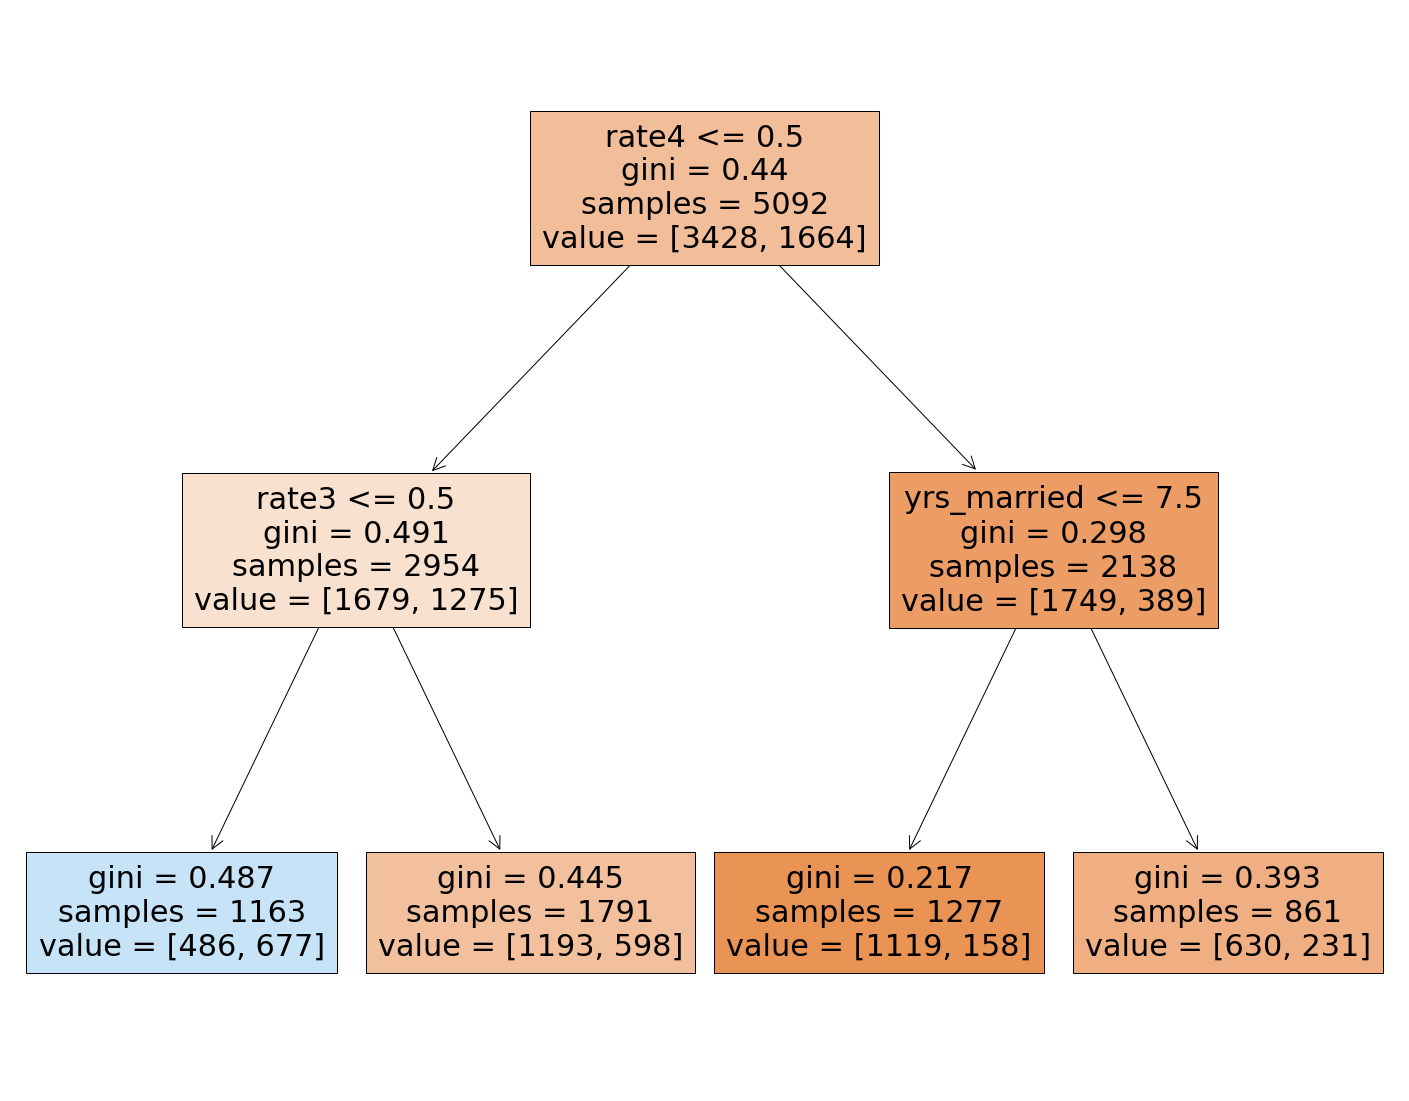

In [92]:
#4- Pick 3 models with max_depth = 2, 3, 4 and. You can pick which ever criterions you want and visualize the 3 trees.
#Max depth 2
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(giniTree1, feature_names = features, filled=True)

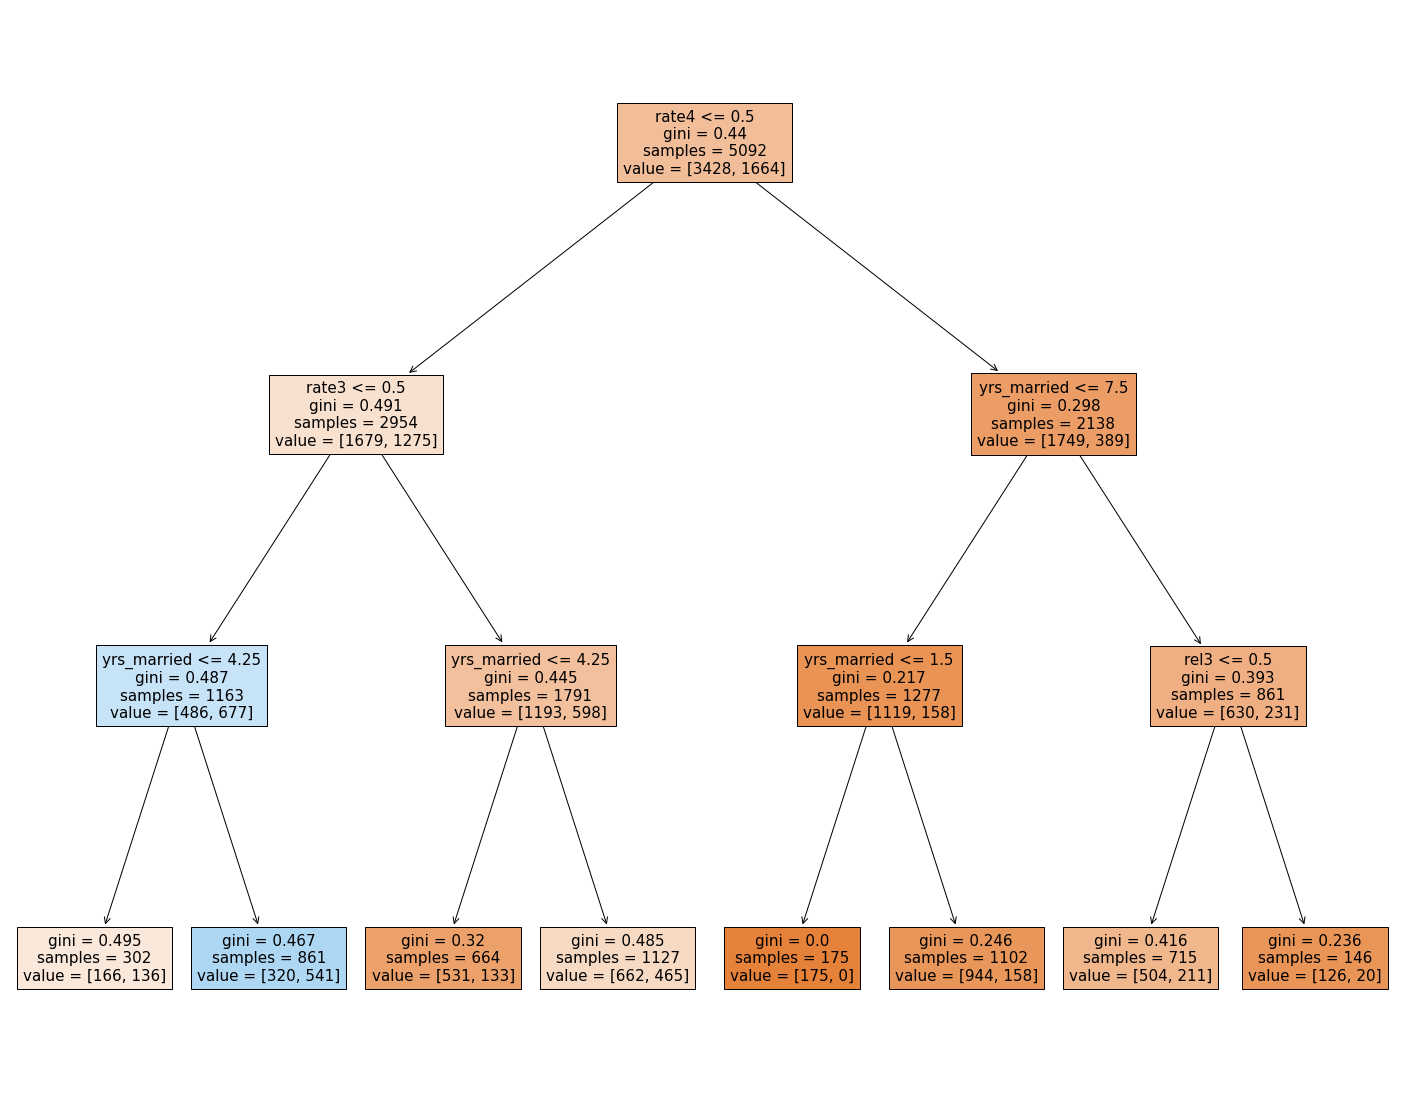

In [93]:
#4- Pick 3 models with max_depth = 2, 3, 4 and. You can pick which ever criterions you want and visualize the 3 trees.
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(giniTree2, feature_names = features, filled=True)

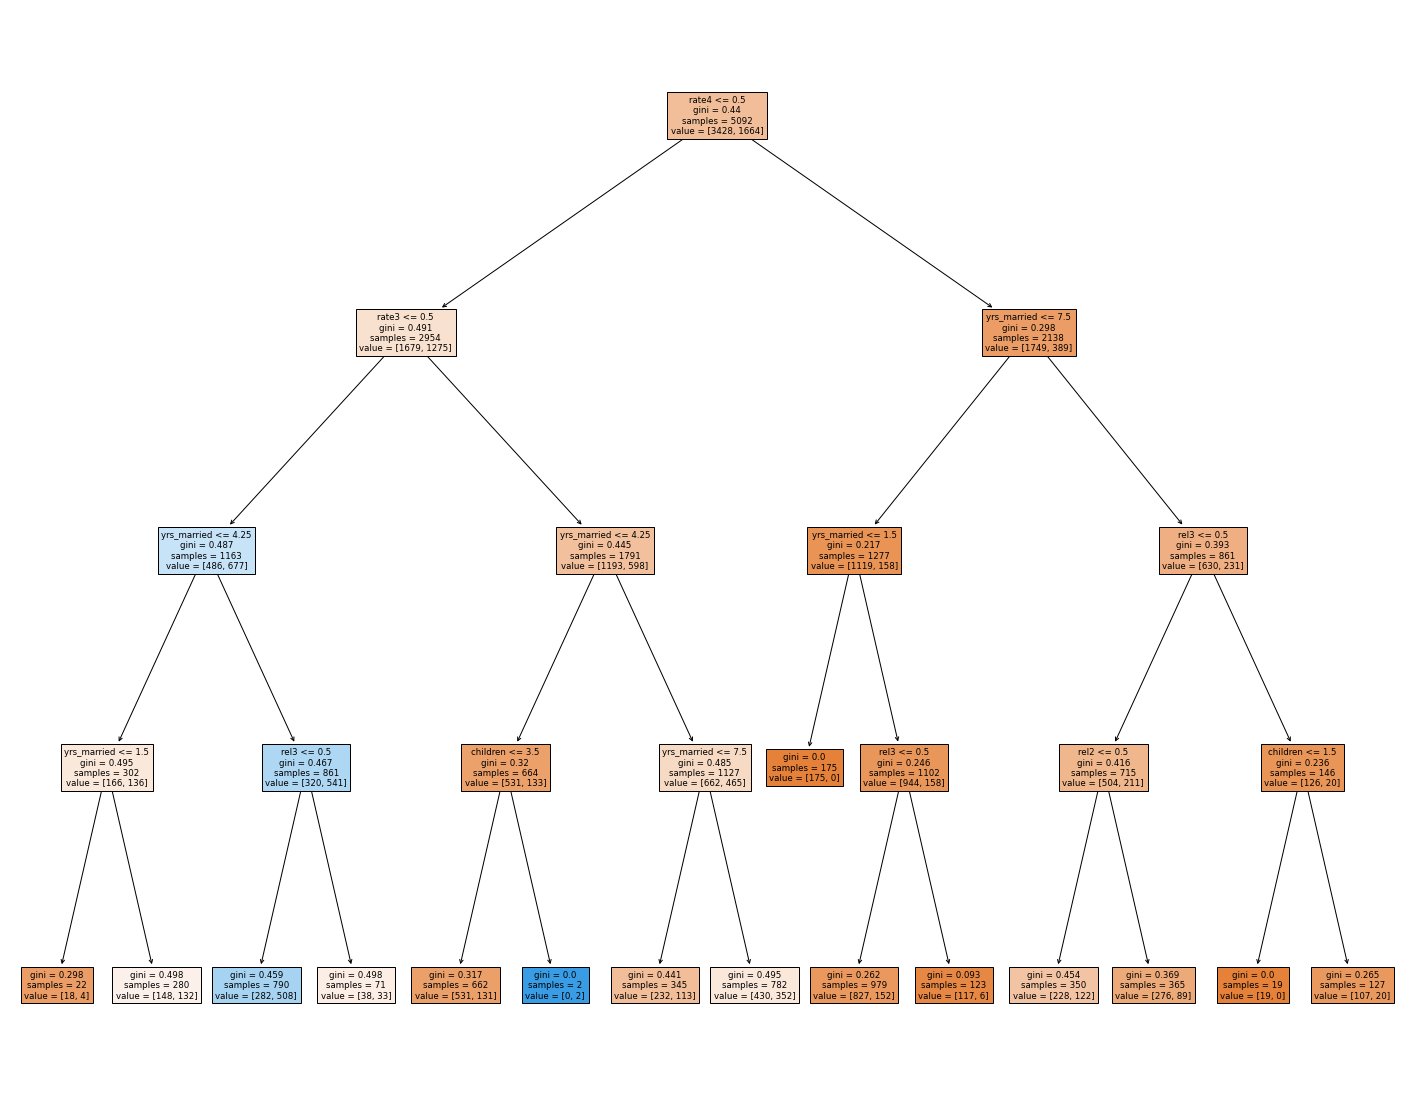

In [94]:
#4- Pick 3 models with max_depth = 2, 3, 4 and. You can pick which ever criterions you want and visualize the 3 trees.
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(giniTree3, feature_names = features, filled=True)

In [95]:
#5- Build a Random Forest Classifier with, say 100 trees. 
# Comment on its model performance when compared with the individual trees models above.
from sklearn.ensemble import RandomForestClassifier

In [96]:
randomForest = RandomForestClassifier(n_estimators=100)
randomForest.fit(X_train, Y_train)

RandomForestClassifier()

In [97]:
Y_pred = randomForest.predict(X_test)
print(classification_report(Y_test, Y_pred))
print(accuracy_score(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.76      0.86      0.80       885
           1       0.54      0.37      0.44       389

    accuracy                           0.71      1274
   macro avg       0.65      0.61      0.62      1274
weighted avg       0.69      0.71      0.69      1274

0.7095761381475667


The Random Forest model performance is worse than the individual tree models above because it has a lower accuracy score.

### Part C: Now finally create a dataframe including all other categorical variable and build decision tree model

In [100]:
# Type your code here, fill in the missing code here

edu.columns = ['edu1','edu2','edu3','edu4','edu5' ]
husb_occ.columns = ['husb_occ1', 'husb_occ2', 'husb_occ3', 'husb_occ4', 'husb_occ5']
occ.columns = ['occ1', 'occ2', 'occ3', 'occ4', 'occ5']
# ...

# df2 = pd.concat[df, ....]
df2 = pd.concat([df, edu, husb_occ, occ], axis=1)
df2.columns

Index(['age', 'yrs_married', 'children', 'had_affair', 'rate1', 'rate2',
       'rate3', 'rate4', 're1', 'rel2', 'rel3', 'edu1', 'edu2', 'edu3', 'edu4',
       'edu5', 'husb_occ1', 'husb_occ2', 'husb_occ3', 'husb_occ4', 'husb_occ5',
       'occ1', 'occ2', 'occ3', 'occ4', 'occ5'],
      dtype='object')

***Use the same model as in Part B step 1 with this new dataframe. Comment on whether the additional variables help the model performance or not***

***Type your code and answers here***

In [103]:
X2 = df2[['age', 'yrs_married', 'children', 'rate1', 'rate2', 'rate3', 'rate4', 're1', 'rel2', 'rel3', 'edu1', 'edu2', 
          'edu3', 'edu4', 'edu5', 'husb_occ1', 'husb_occ2', 'husb_occ3', 'husb_occ4', 'husb_occ5', 'occ1', 'occ2', 
          'occ3', 'occ4', 'occ5']].values
X2

array([[32. ,  9. ,  3. , ...,  0. ,  0. ,  0. ],
       [27. , 13. ,  3. , ...,  0. ,  0. ,  0. ],
       [22. ,  2.5,  0. , ...,  0. ,  0. ,  0. ],
       ...,
       [22. ,  2.5,  0. , ...,  0. ,  0. ,  0. ],
       [32. ,  6. ,  1. , ...,  0. ,  0. ,  0. ],
       [22. ,  2.5,  0. , ...,  0. ,  0. ,  0. ]])

In [104]:
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y, test_size=0.2, random_state=0)

In [106]:
newTree = DecisionTreeClassifier(max_depth=3, criterion='gini')
newTree.fit(X2_train, Y2_train)

DecisionTreeClassifier(max_depth=3)

In [107]:
pred2 = newTree.predict(X2_test)

In [114]:
print(classification_report(Y2_test, pred2))
print(accuracy_score(Y2_test, pred2))

              precision    recall  f1-score   support

           0       0.76      0.92      0.83       885
           1       0.65      0.32      0.43       389

    accuracy                           0.74      1274
   macro avg       0.70      0.62      0.63      1274
weighted avg       0.72      0.74      0.71      1274

0.7401883830455259


In this case, adding the other categorical variables had no affect on the model performance. The previous best model performance with the same max_depth of 3 was also 0.7401883830455259.

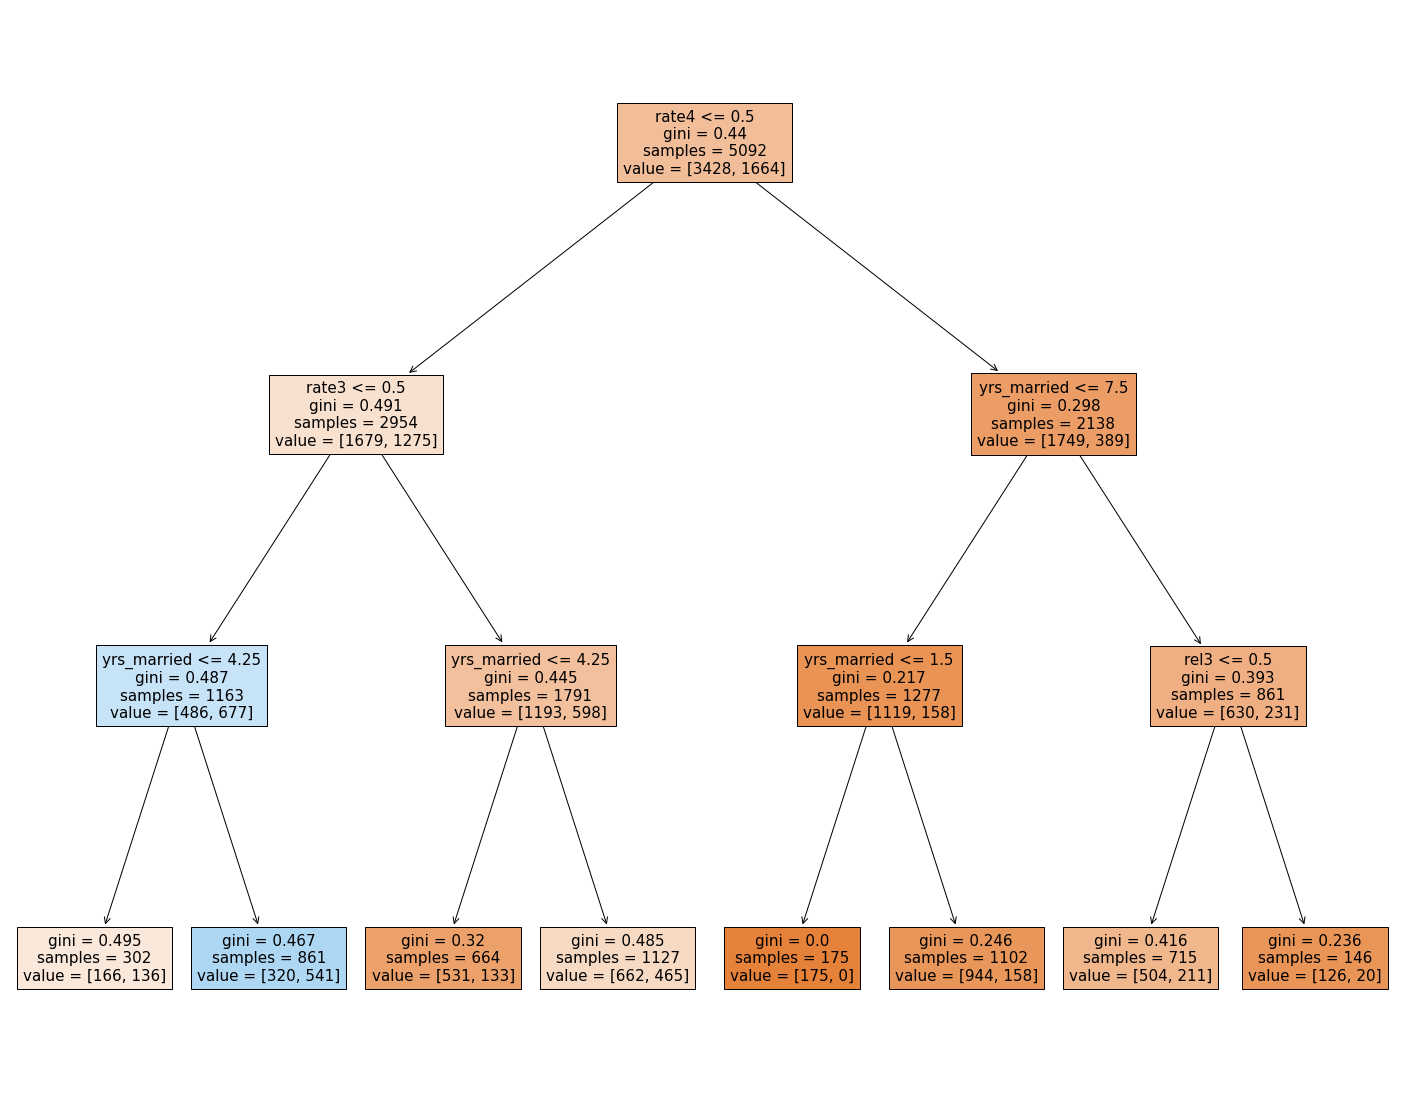

In [115]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(newTree, feature_names = features, filled=True)